## Importações e Carregamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregue o arquivo CSV em um DataFrame do pandas
df = pd.read_csv("C:/Users/Administrador/Documents/GitHub/TJGO_CienciaDeDados/microdados_censo_escolar_2024/dados/microdados_ed_basica_2024.csv", delimiter=';', encoding='latin1', low_memory=False)
display(df.head())

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
0,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Ji-Paraná,1102,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Ji-Paraná,1102,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Ji-Paraná,1102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Ji-Paraná,1102,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Ji-Paraná,1102,...,35.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparação dos Dados

In [3]:
# Obtenha a lista de colunas do DataFrame
print(df.columns.to_list())

['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF', 'NO_MUNICIPIO', 'CO_MUNICIPIO', 'NO_REGIAO_GEOG_INTERM', 'CO_REGIAO_GEOG_INTERM', 'NO_REGIAO_GEOG_IMED', 'CO_REGIAO_GEOG_IMED', 'NO_MESORREGIAO', 'CO_MESORREGIAO', 'NO_MICRORREGIAO', 'CO_MICRORREGIAO', 'NO_DISTRITO', 'CO_DISTRITO', 'NO_ENTIDADE', 'CO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA', 'DS_ENDERECO', 'NU_ENDERECO', 'DS_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP', 'NU_DDD', 'NU_TELEFONE', 'TP_SITUACAO_FUNCIONAMENTO', 'CO_ORGAO_REGIONAL', 'DT_ANO_LETIVO_INICIO', 'DT_ANO_LETIVO_TERMINO', 'IN_VINCULO_SECRETARIA_EDUCACAO', 'IN_VINCULO_SEGURANCA_PUBLICA', 'IN_VINCULO_SECRETARIA_SAUDE', 'IN_VINCULO_OUTRO_ORGAO', 'IN_PODER_PUBLICO_PARCERIA', 'TP_PODER_PUBLICO_PARCERIA', 'IN_FORMA_CONT_TERMO_COLABORA', 'IN_FORMA_CONT_TERMO_FOMENTO', 'IN_FORMA_CONT_ACORDO_COOP', 'IN_FORMA_CONT_PRESTACAO_SERV', 'IN_FORMA_CONT_COOP_TEC_FIN', 'IN_FORMA_CONT_CONSORCIO_PUB', 'IN_FORMA

In [4]:
# Lista de colunas reordenada por grupo lógico
lista_reordenada = [
    # --- Identificação da Escola ---
    'CO_ENTIDADE',
    'NO_ENTIDADE',
    
    # --- Localização Geográfica ---
    'NO_REGIAO',
    'CO_REGIAO',
    'NO_UF',
    'SG_UF',
    'CO_UF',
    'NO_MUNICIPIO',
    'CO_MUNICIPIO',
    'NO_DISTRITO',
    'CO_DISTRITO',
    'NO_REGIAO_GEOG_INTERM',
    'CO_REGIAO_GEOG_INTERM',
    'NO_REGIAO_GEOG_IMED',
    'CO_REGIAO_GEOG_IMED',
    'NO_MESORREGIAO',
    'CO_MESORREGIAO',
    'NO_MICRORREGIAO',
    'CO_MICRORREGIAO',
    
    # --- Características Administrativas ---
    'TP_DEPENDENCIA',
    'TP_CATEGORIA_ESCOLA_PRIVADA',
    'TP_LOCALIZACAO',
    'TP_LOCALIZACAO_DIFERENCIADA',
    'TP_SITUACAO_FUNCIONAMENTO',
    'IN_PREDIO_COMPARTILHADO',
    'CO_ORGAO_REGIONAL',
    'CO_ESCOLA_SEDE_VINCULADA',
    'CO_IES_OFERTANTE',

    # --- Matrículas: Totais por Etapa ---
    'QT_MAT_BAS',
    'QT_MAT_INF',
    'QT_MAT_INF_CRE',
    'QT_MAT_INF_PRE',
    'QT_MAT_FUND',
    'QT_MAT_FUND_AI',
    'QT_MAT_FUND_AF',
    'QT_MAT_MED',
    
    # --- Matrículas: Detalhado por Ano (Ensino Fundamental) ---
    'QT_MAT_FUND_AI_1',
    'QT_MAT_FUND_AI_2',
    'QT_MAT_FUND_AI_3',
    'QT_MAT_FUND_AI_4',
    'QT_MAT_FUND_AI_5',
    'QT_MAT_FUND_AF_6',
    'QT_MAT_FUND_AF_7',
    'QT_MAT_FUND_AF_8',
    'QT_MAT_FUND_AF_9',
    
    # --- Matrículas: Perfil Demográfico (Sexo e Cor/Raça) ---
    'QT_MAT_BAS_FEM',
    'QT_MAT_BAS_MASC',
    'QT_MAT_BAS_ND',
    'QT_MAT_BAS_BRANCA',
    'QT_MAT_BAS_PRETA',
    'QT_MAT_BAS_PARDA',
    'QT_MAT_BAS_AMARELA',
    'QT_MAT_BAS_INDIGENA',
    
    # --- Matrículas: Perfil por Faixa Etária ---
    'QT_MAT_BAS_0_3',
    'QT_MAT_BAS_4_5',
    'QT_MAT_BAS_6_10',
    'QT_MAT_BAS_11_14',
    'QT_MAT_BAS_15_17',
    'QT_MAT_BAS_18_MAIS',
    
    # --- Matrículas: Modalidades Específicas (Integral, EAD, Turno) ---
    'QT_MAT_INF_INT',
    'QT_MAT_INF_CRE_INT',
    'QT_MAT_INF_PRE_INT',
    'QT_MAT_FUND_INT',
    'QT_MAT_FUND_AI_INT',
    'QT_MAT_FUND_AF_INT',
    'QT_MAT_MED_INT',
    'QT_MAT_BAS_EAD',
    'QT_MAT_BAS_D',
    'QT_MAT_BAS_N',
    
    # --- Matrículas: Localização do Aluno (Zona) ---
    'QT_MAT_ZR_URB',
    'QT_MAT_ZR_RUR',
    'QT_MAT_ZR_NA',

    # --- Transporte Escolar ---
    'QT_TRANSP_PUBLICO',
    'QT_TRANSP_RESP_EST',
    'QT_TRANSP_RESP_MUN',
    
    # --- Infraestrutura: Tecnologia e Internet ---
    'IN_INTERNET',
    'IN_BANDA_LARGA',
    'IN_INTERNET_ALUNOS',
    'IN_ACESSO_INTERNET_COMPUTADOR',
    'IN_ACES_INTERNET_DISP_PESSOAIS',
    'TP_REDE_LOCAL',
    'IN_LABORATORIO_INFORMATICA',
    'IN_COMPUTADOR',
    'IN_DESKTOP_ALUNO',
    'QT_DESKTOP_ALUNO',
    'IN_COMP_PORTATIL_ALUNO',
    'QT_COMP_PORTATIL_ALUNO',
    'IN_TABLET_ALUNO',
    'QT_TABLET_ALUNO',
    
    # --- Infraestrutura: Prédio e Ocupação ---
    'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
    'TP_OCUPACAO_PREDIO_ESCOLAR',
    'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
    'IN_LOCAL_FUNC_UNID_PRISIONAL',
    'IN_LOCAL_FUNC_PRISIONAL_SOCIO',
    'IN_LOCAL_FUNC_GALPAO',
    'TP_OCUPACAO_GALPAO',
    'IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
    'IN_LOCAL_FUNC_OUTROS',

    # --- Informações do Censo e Ano Letivo ---
    'NU_ANO_CENSO',
    'DT_ANO_LETIVO_INICIO',
    'DT_ANO_LETIVO_TERMINO'
]

# Use a nova lista para reordenar as colunas do seu DataFrame
df_filtrado = df[lista_reordenada].copy()

# Visualize o resultado. A ordem estará muito mais clara!
df_filtrado.head()

,CO_ENTIDADE,NO_ENTIDADE,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_DISTRITO,...,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,NU_ANO_CENSO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO
0,11022558,EIEEF HAP BITT TUPARI,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2024,12FEB2024:00:00:00,13DEC2024:00:00:00
1,11024275,CEEJA LUIZ VAZ DE CAMOES,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2024,09FEB2024:00:00:00,19DEC2024:00:00:00
2,11024291,EMMEF 7 DE SETEMBRO,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,NaN,NaN
3,11024666,EMEIEF BOA ESPERANCA,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2024,08FEB2024:00:00:00,14DEC2024:00:00:00
4,11024682,EEEFM EURIDICE LOPES PEDROSO,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2024,09FEB2024:00:00:00,14DEC2024:00:00:00


88888 - registro com marcação de valor extremo (valor superior ao limite máximo de 4 equipamentos para cada 3 matrículas - foram marcados apenas valores>3)

In [5]:
# --- 1. Mapeamento de Variáveis Categóricas ---

# Dicionário para a dependência administrativa
mapa_dependencia = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}

mapa_categoria_privada = {
    1: 'Particular',
    2: 'Comunitária',
    3: 'Confessional',
    4: 'Filantrópica'
}

# Dicionário para a localização
mapa_localizacao = {
    1: 'Urbana',
    2: 'Rural'
}

mapa_localizacao_diferenciada = {
    0: 'Sem área de localização diferenciada',
    1: 'Área de Assentamento',
    2: 'Indígena',
    3: 'Comunidade Quilombola',
    8: 'Área onde se localizam povos e comunidades tradicionais'
}

mapa_situacao_funcionamento = {
    1: 'Em Atividade',
    2: 'Paralisada',
    3: 'Extinta (ano do Censo)',
    4: 'Extinta em Anos Anteriores'
}

mapa_ocupacao_predio_galpao = {
    1: 'Próprio',
    2: 'Alugado',
    3: 'Cedido',
    9: 'Não informado'
}

mapa_rede_local = {
    0: 'Não há rede local interligando os computadores',
    1: 'A cabo',
    2: 'Sem fio (wireless)',
    3: 'A cabo e sem fio (wireless)',
    9: 'Não informado'
}

In [6]:
# Aplicando os mapas nas colunas
df_filtrado['TP_DEPENDENCIA'] = df_filtrado['TP_DEPENDENCIA'].map(mapa_dependencia)
df_filtrado['TP_LOCALIZACAO'] = df_filtrado['TP_LOCALIZACAO'].map(mapa_localizacao)
df_filtrado['TP_CATEGORIA_ESCOLA_PRIVADA'] = df_filtrado['TP_CATEGORIA_ESCOLA_PRIVADA'].map(mapa_categoria_privada)
df_filtrado['TP_LOCALIZACAO_DIFERENCIADA'] = df_filtrado['TP_LOCALIZACAO_DIFERENCIADA'].map(mapa_localizacao_diferenciada)
df_filtrado['TP_SITUACAO_FUNCIONAMENTO'] = df_filtrado['TP_SITUACAO_FUNCIONAMENTO'].map(mapa_situacao_funcionamento)
df_filtrado['TP_OCUPACAO_PREDIO_ESCOLAR'] = df_filtrado['TP_OCUPACAO_PREDIO_ESCOLAR'].map(mapa_ocupacao_predio_galpao)
df_filtrado['TP_OCUPACAO_GALPAO'] = df_filtrado['TP_OCUPACAO_GALPAO'].map(mapa_ocupacao_predio_galpao)
df_filtrado['TP_REDE_LOCAL'] = df_filtrado['TP_REDE_LOCAL'].map(mapa_rede_local)

In [7]:
# --- Verificação ---
print("Valores da coluna TP_DEPENDENCIA após o mapeamento:")
display(df_filtrado['TP_DEPENDENCIA'].value_counts())

print("\nValores da coluna TP_LOCALIZACAO após o mapeamento:")
display(df_filtrado['TP_LOCALIZACAO'].value_counts())

Valores da coluna TP_DEPENDENCIA após o mapeamento:


TP_DEPENDENCIA
Municipal    128999
Privada       52568
Estadual      33254
Federal         724
Name: count, dtype: int64


Valores da coluna TP_LOCALIZACAO após o mapeamento:


TP_LOCALIZACAO
Urbana    144456
Rural      71089
Name: count, dtype: int64

In [8]:
# 1. Definir o formato da data
# Analisando '12FEB2024:00:00:00', o formato é:
# %d - Dia com dois dígitos (12)
# %b - Mês abreviado em inglês (FEB)
# %Y - Ano com quatro dígitos (2024)
# :%H:%M:%S - Hora, Minuto, Segundo
formato_data = '%d%b%Y:%H:%M:%S'

# 2. Converter as colunas para o formato datetime
# O parâmetro 'errors='coerce'' é crucial: ele transforma qualquer valor 
# que não siga o formato (como 'NaN') em NaT (Not a Time), que é o nulo para datas.
df_filtrado['DT_ANO_LETIVO_INICIO'] = pd.to_datetime(df_filtrado['DT_ANO_LETIVO_INICIO'], 
                                                 format=formato_data, 
                                                 errors='coerce')

df_filtrado['DT_ANO_LETIVO_TERMINO'] = pd.to_datetime(df_filtrado['DT_ANO_LETIVO_TERMINO'], 
                                                  format=formato_data, 
                                                  errors='coerce')

# 3. Verificar o resultado
print("Tipos de dados após a conversão:")
print(df_filtrado[['DT_ANO_LETIVO_INICIO', 'DT_ANO_LETIVO_TERMINO']].dtypes)

print("\nPré-visualização das colunas corrigidas:")
display(df_filtrado[['DT_ANO_LETIVO_INICIO', 'DT_ANO_LETIVO_TERMINO']].head())

# Calcular a diferença entre as datas (o resultado é em dias, horas, etc.)
df_filtrado['DURACAO_ANO_LETIVO'] = df_filtrado['DT_ANO_LETIVO_TERMINO'] - df_filtrado['DT_ANO_LETIVO_INICIO']

# Extrair apenas o número de dias
df_filtrado['DURACAO_EM_DIAS'] = df_filtrado['DURACAO_ANO_LETIVO'].dt.days

# Ver as escolas com o maior ano letivo
print("\nEscolas com o maior ano letivo (em dias):")
display(df_filtrado.sort_values(by='DURACAO_EM_DIAS', ascending=False)[['NO_ENTIDADE', 'DURACAO_EM_DIAS']].head())

Tipos de dados após a conversão:
DT_ANO_LETIVO_INICIO     datetime64[ns]
DT_ANO_LETIVO_TERMINO    datetime64[ns]
dtype: object

Pré-visualização das colunas corrigidas:


,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO
0,2024-02-12,2024-12-13
1,2024-02-09,2024-12-19
2,NaT,NaT
3,2024-02-08,2024-12-14
4,2024-02-09,2024-12-14



Escolas com o maior ano letivo (em dias):


,NO_ENTIDADE,DURACAO_EM_DIAS
96689,ESCOLA ALBANO CURSOS TECNICOS,700.0
50830,CEPEP - ESCOLA TECNICA,681.0
47542,JK COLEGIO,666.0
63116,ESCOLA DE CIENCIAS DA SAUDE DE PATOS,665.0
138079,COLEGIO SANTOS MOURA,634.0


In [9]:
# --- 2. Verificação de Consistência e Tratamento de Zeros ---

# Seleciona todas as colunas que começam com 'QT_'
colunas_qt = [col for col in df_filtrado.columns if col.startswith('QT_')]

print(f"Total de valores nulos nas colunas de quantidade antes da limpeza: {df_filtrado[colunas_qt].isnull().sum().sum()}")

# Substitui valores NaN por 0 nessas colunas
df_filtrado[colunas_qt] = df_filtrado[colunas_qt].fillna(0)

print(f"Total de valores nulos nas colunas de quantidade após limpeza: {df_filtrado[colunas_qt].isnull().sum().sum()}")

Total de valores nulos nas colunas de quantidade antes da limpeza: 1807613
Total de valores nulos nas colunas de quantidade após limpeza: 0


In [10]:
# --- 3. Derivação de Novos Atributos ---

# --- Criando a coluna de Percentual de Tempo Integral ---
# Seleciona todas as colunas de matrícula em tempo integral
colunas_integral = [col for col in df_filtrado.columns if col.endswith('_INT')]

# Soma as matrículas em tempo integral por escola (linha a linha)
soma_integral = df_filtrado[colunas_integral].sum(axis=1)
total_alunos = df_filtrado['QT_MAT_BAS']

# Calcula o percentual (e trata a divisão por zero, caso uma escola não tenha alunos)
# Multiplicar por 100 para ter o valor percentual
df_filtrado['PC_TEMPO_INTEGRAL'] = (soma_integral / total_alunos).fillna(0) * 100


# --- Criando a coluna de Índice de Tecnologia ---
# Lista das colunas que representam recursos tecnológicos (1 se tem, 0 se não tem)
colunas_tec = ['IN_INTERNET', 'IN_BANDA_LARGA', 'IN_LABORATORIO_INFORMATICA', 'IN_COMPUTADOR']

# Soma os indicadores. O resultado será um número de 0 a 4.
df_filtrado['INDICE_TEC'] = df_filtrado[colunas_tec].sum(axis=1)


# --- Verificação dos novos atributos ---
print("\nEstatísticas descritivas dos novos atributos:")
print(df_filtrado[['PC_TEMPO_INTEGRAL', 'INDICE_TEC']].describe())


Estatísticas descritivas dos novos atributos:
       PC_TEMPO_INTEGRAL     INDICE_TEC
count      215545.000000  215545.000000
mean           40.258961       2.419318
std            69.517380       1.419523
min             0.000000       0.000000
25%             0.000000       2.000000
50%             0.000000       3.000000
75%            48.979592       3.000000
max           200.000000       4.000000


In [11]:
print(df_filtrado.columns.to_list())

['CO_ENTIDADE', 'NO_ENTIDADE', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF', 'NO_MUNICIPIO', 'CO_MUNICIPIO', 'NO_DISTRITO', 'CO_DISTRITO', 'NO_REGIAO_GEOG_INTERM', 'CO_REGIAO_GEOG_INTERM', 'NO_REGIAO_GEOG_IMED', 'CO_REGIAO_GEOG_IMED', 'NO_MESORREGIAO', 'CO_MESORREGIAO', 'NO_MICRORREGIAO', 'CO_MICRORREGIAO', 'TP_DEPENDENCIA', 'TP_CATEGORIA_ESCOLA_PRIVADA', 'TP_LOCALIZACAO', 'TP_LOCALIZACAO_DIFERENCIADA', 'TP_SITUACAO_FUNCIONAMENTO', 'IN_PREDIO_COMPARTILHADO', 'CO_ORGAO_REGIONAL', 'CO_ESCOLA_SEDE_VINCULADA', 'CO_IES_OFERTANTE', 'QT_MAT_BAS', 'QT_MAT_INF', 'QT_MAT_INF_CRE', 'QT_MAT_INF_PRE', 'QT_MAT_FUND', 'QT_MAT_FUND_AI', 'QT_MAT_FUND_AF', 'QT_MAT_MED', 'QT_MAT_FUND_AI_1', 'QT_MAT_FUND_AI_2', 'QT_MAT_FUND_AI_3', 'QT_MAT_FUND_AI_4', 'QT_MAT_FUND_AI_5', 'QT_MAT_FUND_AF_6', 'QT_MAT_FUND_AF_7', 'QT_MAT_FUND_AF_8', 'QT_MAT_FUND_AF_9', 'QT_MAT_BAS_FEM', 'QT_MAT_BAS_MASC', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA', 'QT_MAT_BAS_PRETA', 'QT_MAT_BAS_PARDA', 'QT_MAT_BAS_AMARELA', 'QT_MAT_BAS_IND

## Visualização dos Dados


Gerando o Gráfico 1: Infraestrutura Tecnológica...


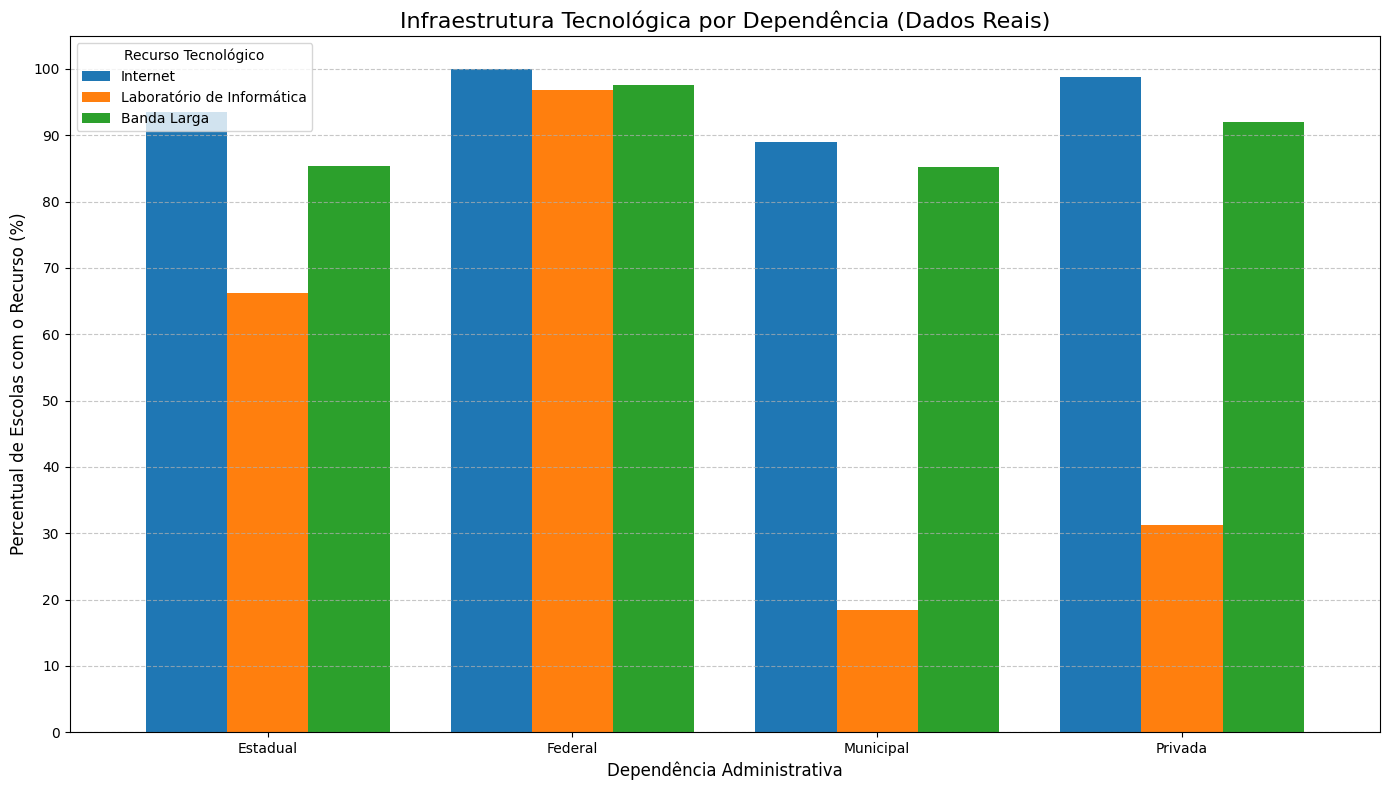

Imagem 'grafico_infraestrutura_dados_reais.png' salva com sucesso.

Gerando o Gráfico 2: Relação Alunos x Transporte...


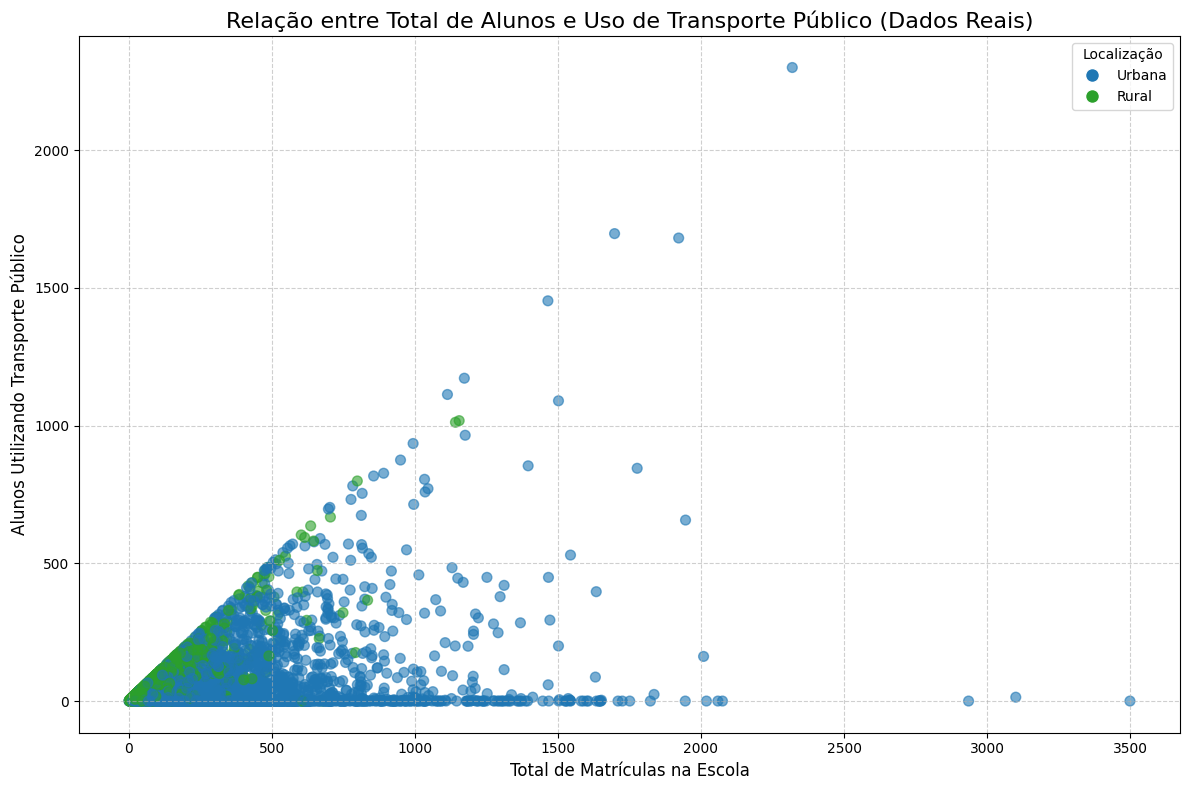

Imagem 'grafico_alunos_transporte_dados_reais.png' salva com sucesso.


In [12]:
print("\nGerando o Gráfico 1: Infraestrutura Tecnológica...")

# Colunas de interesse para o primeiro gráfico
infra_cols = ['TP_DEPENDENCIA', 'IN_INTERNET', 'IN_LABORATORIO_INFORMATICA', 'IN_BANDA_LARGA']

# Verificar se todas as colunas necessárias existem no DataFrame
if all(col in df.columns for col in infra_cols):
    # Mapeia os códigos de dependência para texto, caso ainda não tenham sido
    mapa_dependencia = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}
    # Cria uma nova coluna para não alterar a original, aplicando o mapa de forma segura
    df['TP_DEPENDENCIA_TXT'] = df['TP_DEPENDENCIA'].apply(lambda x: mapa_dependencia.get(x, x))

    recursos_tec = ['IN_INTERNET', 'IN_LABORATORIO_INFORMATICA', 'IN_BANDA_LARGA']
    percentuais = df.groupby('TP_DEPENDENCIA_TXT')[recursos_tec].mean() * 100
    percentuais = percentuais.rename(columns={
        'IN_INTERNET': 'Internet',
        'IN_LABORATORIO_INFORMATICA': 'Laboratório de Informática',
        'IN_BANDA_LARGA': 'Banda Larga'
    })

    # Criação do gráfico
    ax1 = percentuais.plot(kind='bar', figsize=(14, 8), width=0.8,
                           color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Infraestrutura Tecnológica por Dependência (Dados Reais)', fontsize=16)
    plt.xlabel('Dependência Administrativa', fontsize=12)
    plt.ylabel('Percentual de Escolas com o Recurso (%)', fontsize=12)
    plt.xticks(rotation=0)
    plt.yticks(np.arange(0, 101, 10))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Recurso Tecnológico')
    plt.tight_layout()
    plt.savefig('grafico_infraestrutura_dados_reais.png')
    plt.show()
    print("Imagem 'grafico_infraestrutura_dados_reais.png' salva com sucesso.")

else:
    print("Aviso: Não foi possível gerar o gráfico de infraestrutura. Colunas necessárias não encontradas.")


# --- Bloco 3: Gráfico de Dispersão (Alunos vs. Transporte) ---

print("\nGerando o Gráfico 2: Relação Alunos x Transporte...")

# Colunas de interesse para o segundo gráfico
transporte_cols = ['QT_MAT_BAS', 'QT_TRANSP_PUBLICO', 'TP_LOCALIZACAO']

# Verificar se todas as colunas necessárias existem
if all(col in df.columns for col in transporte_cols):
    # Prepara um DataFrame específico para este gráfico, removendo dados ausentes
    df_transporte = df[transporte_cols].dropna()

    # Pega uma amostra de até 5000 pontos para o gráfico não ficar sobrecarregado
    amostra_size = min(5000, len(df_transporte))
    df_amostra = df_transporte.sample(n=amostra_size, random_state=42)

    # Mapeia os códigos de localização para texto
    mapa_localizacao = {1: 'Urbana', 2: 'Rural'}
    df_amostra['TP_LOCALIZACAO_TXT'] = df_amostra['TP_LOCALIZACAO'].apply(lambda x: mapa_localizacao.get(x, x))

    # Define as cores e plota o gráfico
    cores = {'Urbana': '#1f77b4', 'Rural': '#2ca02c'}
    cores_pontos = df_amostra['TP_LOCALIZACAO_TXT'].map(cores)

    plt.figure(figsize=(12, 8))
    plt.scatter(df_amostra['QT_MAT_BAS'], df_amostra['QT_TRANSP_PUBLICO'], c=cores_pontos, alpha=0.6, s=50)
    plt.title('Relação entre Total de Alunos e Uso de Transporte Público (Dados Reais)', fontsize=16)
    plt.xlabel('Total de Matrículas na Escola', fontsize=12)
    plt.ylabel('Alunos Utilizando Transporte Público', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Cria uma legenda customizada para as cores
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                         markerfacecolor=cores[label], markersize=10,
                         label=label) for label in cores.keys()]
    plt.legend(title='Localização', handles=handles)
    
    plt.tight_layout()
    plt.savefig('grafico_alunos_transporte_dados_reais.png')
    plt.show()
    print("Imagem 'grafico_alunos_transporte_dados_reais.png' salva com sucesso.")

else:
    print("Aviso: Não foi possível gerar o gráfico de alunos e transporte. Colunas necessárias não encontradas.")

In [13]:
# Visualize o DataFrame final
display(df_filtrado.head())

,CO_ENTIDADE,NO_ENTIDADE,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_DISTRITO,...,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,NU_ANO_CENSO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,DURACAO_ANO_LETIVO,DURACAO_EM_DIAS,PC_TEMPO_INTEGRAL,INDICE_TEC
0,11022558,EIEEF HAP BITT TUPARI,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,NaN,0.0,0.0,2024,2024-02-12,2024-12-13,305 days,305.0,0.000000,1.0
1,11024275,CEEJA LUIZ VAZ DE CAMOES,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,NaN,1.0,0.0,2024,2024-02-09,2024-12-19,314 days,314.0,0.000000,4.0
2,11024291,EMMEF 7 DE SETEMBRO,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,NaN,NaN,NaN,2024,NaT,NaT,NaT,NaN,0.000000,0.0
3,11024666,EMEIEF BOA ESPERANCA,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,NaN,0.0,0.0,2024,2024-02-08,2024-12-14,310 days,310.0,0.000000,2.0
4,11024682,EEEFM EURIDICE LOPES PEDROSO,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Alta Floresta D'Oeste,...,NaN,1.0,0.0,2024,2024-02-09,2024-12-14,309 days,309.0,4.347826,4.0


In [14]:
df_filtrado.to_csv("C:/Users/Administrador/Documents/GitHub/TJGO_CienciaDeDados/microdados_censo_escolar_2024/dados/microdados_ed_basica_2024_tratado.csv", index=False, sep=';', encoding='latin1')

In [ ]:
df_filtrado.describe()

,CO_ENTIDADE,CO_REGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,CO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_IMED,CO_MESORREGIAO,CO_MICRORREGIAO,IN_PREDIO_COMPARTILHADO,...,IN_LOCAL_FUNC_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,NU_ANO_CENSO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,DURACAO_ANO_LETIVO,DURACAO_EM_DIAS,PC_TEMPO_INTEGRAL,INDICE_TEC
count,2.155450e+05,215545.000000,215545.000000,2.155450e+05,2.155450e+05,215545.000000,215545.000000,215545.000000,215545.000000,177264.000000,...,181065.00000,181065.000000,181065.000000,215545.0,181065,181065,181065,181065.000000,215545.000000,215545.000000
mean,3.048278e+07,2.657399,30.316194,3.046898e+06,3.046898e+08,3034.974720,303173.872222,5.055167,19.971189,0.046338,...,0.01257,0.031817,0.063011,2024.0,2024-02-10 10:27:59.781293824,2024-12-18 06:19:49.005053184,311 days 19:51:49.223759424,311.827653,40.258961,2.419318
min,1.100002e+07,1.000000,11.000000,1.100015e+06,1.100015e+08,1101.000000,110001.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,2024.0,2023-05-31 00:00:00,2024-05-29 00:00:00,1 days 00:00:00,1.000000,0.000000,0.000000
25%,2.328106e+07,2.000000,23.000000,2.313302e+06,2.313302e+08,2306.000000,230016.000000,2.000000,7.000000,0.000000,...,0.00000,0.000000,0.000000,2024.0,2024-02-05 00:00:00,2024-12-13 00:00:00,305 days 00:00:00,305.000000,0.000000,2.000000
50%,3.113590e+07,3.000000,31.000000,3.118809e+06,3.118809e+08,3102.000000,310009.000000,4.000000,15.000000,0.000000,...,0.00000,0.000000,0.000000,2024.0,2024-02-06 00:00:00,2024-12-19 00:00:00,312 days 00:00:00,312.000000,0.000000,3.000000
75%,3.523896e+07,3.000000,35.000000,3.548104e+06,3.548104e+08,3504.000000,350014.000000,6.000000,27.000000,0.000000,...,0.00000,0.000000,0.000000,2024.0,2024-02-19 00:00:00,2024-12-20 00:00:00,319 days 00:00:00,319.000000,48.979592,3.000000
max,5.308601e+07,5.000000,53.000000,5.300108e+06,5.300108e+08,5301.000000,530001.000000,15.000000,66.000000,1.000000,...,1.00000,1.000000,1.000000,2024.0,2024-12-19 00:00:00,2025-12-31 00:00:00,700 days 00:00:00,700.000000,200.000000,4.000000
std,9.466594e+06,1.023320,9.464781,9.502344e+05,9.502344e+07,946.840531,94649.539801,3.898243,17.235537,0.210216,...,0.11141,0.175514,0.242983,0.0,NaN,NaN,15 days 13:33:37.544903857,15.565018,69.517380,1.419523


In [16]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215545 entries, 0 to 215544
Columns: 105 entries, CO_ENTIDADE to INDICE_TEC
dtypes: datetime64[ns](2), float64(73), int64(10), object(19), timedelta64[ns](1)
memory usage: 172.7+ MB
